In [1]:
import warnings
# Ignore all warnings (not recommended in general)
warnings.filterwarnings('ignore')

# Classifiers

In [2]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('catfood_prepared.csv')

# Show general information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            121 non-null    float64
 1   weight           121 non-null    float64
 2   star_rating      121 non-null    float64
 3   total_comments   121 non-null    float64
 4   adult            121 non-null    float64
 5   chicken          121 non-null    float64
 6   wet              121 non-null    float64
 7   from_ocean       121 non-null    float64
 8   company_farmina  121 non-null    int64  
 9   company_me-o     121 non-null    int64  
 10  company_meat     121 non-null    int64  
 11  company_purepet  121 non-null    int64  
 12  company_purina   121 non-null    int64  
 13  company_royal    121 non-null    int64  
 14  company_sheba    121 non-null    int64  
 15  company_whiskas  121 non-null    int64  
dtypes: float64(8), int64(8)
memory usage: 15.2 KB
None


## Preprocessing

In [3]:
import pandas as pd

# Assuming you already have a DataFrame named df
data['yammy'] = (data['star_rating'] >= 4.5).astype(int)
data.head()


,price,weight,star_rating,total_comments,adult,chicken,wet,from_ocean,company_farmina,company_me-o,company_meat,company_purepet,company_purina,company_royal,company_sheba,company_whiskas,yammy
0,189.0,1.2,4.2,8285.0,1.0,0.0,1.0,1.0,0,0,0,1,0,0,0,0,0
1,879.0,7.0,4.3,11737.0,1.0,0.0,1.0,1.0,0,0,0,1,0,0,0,0,0
2,1900.0,7.0,4.5,8056.0,1.0,0.0,1.0,1.0,0,0,0,0,0,0,0,1,1
3,429.0,2.4,4.0,4522.0,1.0,0.0,1.0,1.0,0,0,1,0,0,0,0,0,0
4,369.0,1.1,4.5,12982.0,0.5,0.0,1.0,1.0,0,0,0,0,0,0,0,1,1


In [4]:
data['yammy'].value_counts().sort_index()


0    64
1    57
Name: yammy, dtype: int64

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns (excluding 'yammy' if it's a label)
features = data.drop(columns=['yammy'])  # Drop target column if needed
numeric_cols = features.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

data[numeric_cols].head()


,price,weight,star_rating,total_comments,adult,chicken,wet,from_ocean,company_farmina,company_me-o,company_meat,company_purepet,company_purina,company_royal,company_sheba,company_whiskas
0,0.022888,0.113797,0.60,0.638163,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.128879,0.697885,0.65,0.904091,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.285714,0.697885,0.75,0.620522,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.059754,0.234642,0.50,0.348278,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.050538,0.103726,0.75,1.000000,0.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=['yammy','star_rating'])
y = data['yammy']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.76
Confusion Matrix:
 [[13  2]
 [ 4  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.75      0.60      0.67        10

    accuracy                           0.76        25
   macro avg       0.76      0.73      0.74        25
weighted avg       0.76      0.76      0.75        25



## SVM

In [11]:
from sklearn.svm import SVC

# Create and fit the model
svm = SVC(kernel='linear')  # 'rbf' is the default; you can also try 'linear', 'poly', or 'sigmoid'
svm.fit(X_train, y_train)


SVC(kernel='linear')

In [12]:
y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.84
Confusion Matrix:
 [[11  4]
 [ 0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.71      1.00      0.83        10

    accuracy                           0.84        25
   macro avg       0.86      0.87      0.84        25
weighted avg       0.89      0.84      0.84        25



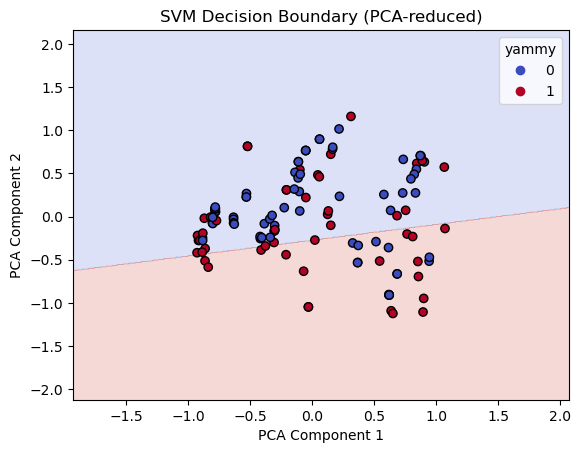

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Reduce feature space to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Train SVM on reduced 2D data
svm_2d = SVC(kernel='linear')
svm_2d.fit(X_reduced, y)

# Create meshgrid for plotting decision boundary
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict on grid
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary (PCA-reduced)')
plt.legend(*scatter.legend_elements(), title="yammy")
plt.show()


In [14]:
# Create and fit the model
svm = SVC(kernel='rbf')  # 'rbf' is the default; you can also try 'linear', 'poly', or 'sigmoid'
svm.fit(X_train, y_train)


SVC()

In [15]:
y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.84
Confusion Matrix:
 [[13  2]
 [ 2  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.80      0.80      0.80        10

    accuracy                           0.84        25
   macro avg       0.83      0.83      0.83        25
weighted avg       0.84      0.84      0.84        25



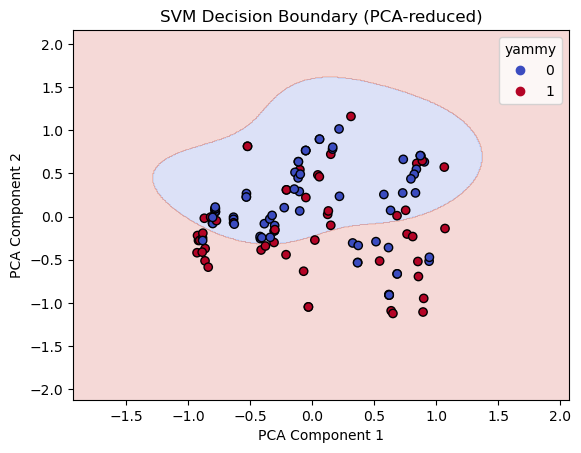

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Reduce feature space to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Train SVM on reduced 2D data
svm_2d = SVC(kernel='rbf')
svm_2d.fit(X_reduced, y)

# Create meshgrid for plotting decision boundary
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict on grid
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary (PCA-reduced)')
plt.legend(*scatter.legend_elements(), title="yammy")
plt.show()
